### Linear regression

$$
\begin{split}
y & = w^T x \\
y_i & = \sum^k_{j=1} w_j x_{ij}
\end{split}
$$

> We transpose $$w$$ because by convention we express all vectors as column vectors here.

### Mean square error (MSE)

$$
\begin{split}
J(w) & = \frac{1}{2} \sum^N_{i=1} (w^T x^i - y^i)^2
\end{split}
$$

which $x^i$ and $y^i$ is the input features and the true value for the $i th$ datapoints in the training dataset.

MSE is popular because it is easy to compute and it has a smooth differentiable  To optimize $w$, we take its differentiate.

$$
\begin{split}
\nabla_w J & = \sum^N_{i=1} (w^T x^i - y^i) x^i \\
\nabla_w J & = 0 \\
\implies \sum^N_{i=1} (w^T x^i - y^i) x^i & = 0 \\
w^T &= \frac{\sum^N_{i=1} y^i x^i}{\sum^N_{i=1} \| x^i \|^2} \\
\end{split}
$$

Mean square error (MSE) is actually the L2-norm:

$$
L_2 = \| x \|_2
$$

Since sometimes it is so common, we often drop its subfix.

$$
L_2 = \| x \|
$$

### Adding a bias

$$
y = w x + b
$$

$$
x = \begin{bmatrix}
x^1_1 & x^1_2\\
x^2_1 & x^2_2\\
\end{bmatrix}
$$

Transform x to:

$$
z = \begin{bmatrix}
1 & x^1_1 & x^1_2\\
1 & x^2_1 & x^2_2\\
\end{bmatrix}
$$

$$
y = w z
$$

### Optimize MSE cost

Here we calculate a generic formula to optimize $J$.

$$
\begin{split}
J(w) & = \frac{1}{2} \| xw - y \|_2^2 \\
2 J(w) & = (xw - y)^T (xw - y) \\
& = (w^Tx^T -y^T) (xw - y) \\
& = w^Tx^T (xw - y) - y^T (xw - y) \\
& = w^Tx^Txw - w^Tx^Ty - y^Txw + y^Ty \\
& = w^Tx^Txw - 2 w^Tx^Ty + y^Ty \\
\text{becase } (y^Txw)^T &= w^T(y^Tx)^T = w^Tx^Ty \\
\end{split}
$$

Setting $ \nabla_w J = 0$ to optimize $J$:

$$
\begin{split}
\nabla_w J = \nabla_w (w^Tx^Txw - 2 w^Tx^Ty + y^Ty) & = 0 \\
\nabla_w (w^Tx^Txw) - 2 \nabla_w (w^Tx^Ty) + \nabla_w (y^Ty) & = 0 \\
\nabla_w (w^T(x^Tx)w) - 2 x^Ty - 0 & = 0 \\
2 (x^Tx) w - 2 x^Ty - 0 & = 0 \\
(x^Tx) w & =  x^Ty
\end{split}
$$

In the following equation, we can solve $x$ using linear algebra:

$$
Ax = b \\
$$

We will adopt the following notation saying $x$ is computed by linear algebra using $A$ and $b$:

$$
x = A \setminus b
$$

Recall 

$$ (x^Tx) w  =  x^Ty$$ 

$w$ can therefore be solved by:

> $$ w = x^Tx \setminus x^Ty $$

Notice that the solution for $w$ are not unique.

MSE is also vulnerable to outlier. With an outlier, our model is shifted from the blue line to the red line which the blue line can model the training dataset better if the outlier is not there.

<img src="images/L2p.png" style="border:none;width:35%">

### L2 regularization with mean square error (MSE)

To avoid overfitting, we use L2-norm as a regularization to the cost function $J$. (With the MSE computed in the previous section)

$$
\begin{split}
J(W) & = \frac{1}{2} \| xw - y \|^2 + \frac{\lambda}{2} w w^T \\
\nabla_w J & = x^Txw - x^Ty + \lambda w \\
\end{split}
$$

Optimize $J$:

$$
\begin{split}
\nabla_w J &= 0 \\
x^Txw - x^Ty + \lambda w  &= 0 \\
x^Txw + \lambda w  &= x^Ty 0 \\
(x^Tx + \lambda I) w &= x^T y \\
 w & = (x^Tx + \lambda I)^{-1} x^T y
\end{split}
$$

With L2 normalization and MSE, $w$ is:

> $$  w = (x^Tx + \lambda I)^{-1} x^T y $$


Let's visualize the solution. In the diagram below, $ W^*_a$ is where regularization cost is 0. i.e. all $w_i = 0$$.  W^*_b $ is where MSE is minimum. The optimal solution for $J$ is where the concentric circle meet with the eclipse $W^*$. 

<div class="imgcap">
<img src="images/L2.png" style="border:none;width:35%">
</div>

> This is also called **ridge regression**.

## Frequentist view of Linear Regression
We could write the regression target of the above model as the predicted value plus some error:

$$
\begin{split}
\hat{y}& = y + \epsilon \\
       & = W^Tx + \epsilon
\end{split}
$$
or equivalently, we could say that the error is:

$$\epsilon = \hat{y} - y$$

Now, let’s say we model the regression target as a Gaussian random variable, i.e. $ y \sim N(\mu, \sigma^2) $, with $ \mu = y = W^Tx $, the prediction of our model. Formally:

$$P(\hat{y} \vert x, W) = N(\hat{y} \vert W^Tx, \sigma^2)$$

Then, to find the optimum $ W $, we could use Maximum Likelihood Estimation (MLE). As the above model is a likelihood, i.e. describing our data $ y $ under parameter $ W $, we will do MLE on that:

$$W_{MLE} = \mathop{\rm arg\,max}\limits_{W} N(\hat{y} \vert W^Tx, \sigma^2)$$

The PDF of Gaussian is given by:

$$P(\hat{y} \vert x, W) = \frac{1}{\sqrt{2 \sigma^2 \pi}} \, \exp \left( -\frac{(\hat{y} - W^Tx)^2}{2 \sigma^2} \right)$$

As we are doing maximization, we could ignore the normalizing constant of the likelihood. Hence:

$$W_{MLE} = \mathop{\rm arg\,max}\limits_{W} \, \exp \left( -\frac{(\hat{y} - W^Tx)^2}{2 \sigma^2} \right)$$

As always, it is easier to optimize the log likelihood:

$$
\begin{split}
W_{MLE} &= \mathop{\rm arg\,max}\limits_{W} \\
        &= \mathop{\rm arg\,max}\limits_{W} -\frac{1}{2 \sigma^2}(\hat{y} - W^Tx)^2\\
        &= \mathop{\rm arg\,min}\limits_{W} \frac{1}{2 \sigma^2}(\hat{y} - W^Tx)^2\\
\end{split}
$$

For simplicity, let’s say $ \sigma^2 = 1 $, then:

$$
\begin{split}
W_{MLE} &= \mathop{\rm arg\,min}\limits_{W} \frac{1}{2} (\hat{y} - W^Tx)^2
        &= \mathop{\rm arg\,min}\limits_{W} \frac{1}{2} \sum_i (\hat{y}_i - W_i x_i)^2
        &= \mathop{\rm arg\,min}\limits_{W} \frac{1}{2} \Vert \hat{y} - W^Tx \Vert^2_2
\end{split}
$$

So we see, doing MLE on Gaussian likelihood is equal to Linear Regression!

### Bayesian view of Linear Regression
But what if we want to go Bayesian, i.e. introduce a prior, and working with the posterior instead? Well, then we are doing MAP estimation! The posterior is likelihood times prior:

$$
P(W \vert \hat{y}, x) = P(\hat{y} \vert x, W) P(W \vert \mu_0, \sigma^2_0)
$$

Since we have already known the likelihood, now we ask, what should be the prior? If we set it to be uniformly distributed, then we will be back to the MLE estimation, full detail here. So, for non-trivial example, let’s use Gaussian prior for weight $ W $:

$$
P(W \vert \mu_0, \sigma^2_0) = N(0, \sigma^2_0)
$$

Expanding the PDF, and again ignoring the normalizing constant and keeping in mind that \( \mu_0 = 0 \), we have:

$$
P(W \vert \mu_0, \sigma^2_0) &= \frac{1}{\sqrt{2 \sigma^2_0 \pi}} \, \exp \left( -\frac{(W - \mu_0)^2}{2 \sigma^2_0} \right) \\
                             &=\propto \exp \left( -\frac{W^2}{2 \sigma^2_0} \right)
$$

Let’s derive the posterior:

$$
P(W \vert \hat{y}, x) &= P(\hat{y} \vert x, W) P(W \vert \mu_0, \sigma^2_0) \\
                      &\propto \exp \left( -\frac{(\hat{y} - W^Tx)^2}{2 \sigma^2} \right) \, \exp \left( -\frac{W^2}{2 \sigma^2_0} \right)

$$

And the log posterior is then:

$$
\log P(W \vert \hat{y}, x) &\propto -\frac{1}{2 \sigma^2}(\hat{y} - W^Tx)^2 - \frac{1}{2 \sigma^2_0} W^2 \\
                           &= -\frac{1}{2 \sigma^2} \Vert \hat{y} - W^Tx\Vert^2_2 - \frac{1}{2 \sigma^2_0} \Vert W \Vert^2_2
$$

Seems familiar, right! Now if we assume that $ \sigma^2 = 1 $ and $ \lambda = \frac{1}{\sigma^2_0} $, then our log posterior becomes:

$$
\log P(W \vert \hat{y}, x) \propto -\frac{1}{2} \Vert \hat{y} - W^Tx\Vert^2_2 - \frac{\lambda}{2} \Vert W \Vert^2_2
$$

That is, the log posterior of Gaussian likelihood and Gaussian prior is the same as the objective function for Ridge Regression! Hence, Gaussian prior is equal to $ \ell_2 $ regularization!

### Full Bayesian Approach
Of course, above is not a full Bayesian, as we are doing a point estimation in the form of MAP. This is just a “shortcut”, as we do not need to compute the full posterior distribution. For full Bayesian approach, we report the full posterior distribution. And in test time, we use the posterior to weight the new data, i.e. we marginalize the posterior predictive distribution:

$$
P(y' \vert \hat{y}, x) &= \int_W P(y' \vert x', W) P(W \vert \hat{y}, x)
                       &= \mathbb{E}_W \left[ P(y' \vert x', W) \right]$$

that is, given the likelihood of our new data point $ (x’, y’) $, we compute the likelihood, and weigh it with the posterior.
Intuitively, given all possible value for $ W $ in the posterior, we try those values one by one to predict the new data. The result is then averaged proportionality to the probability of those values, hence we are taking expectation.
And of course, that is the reason why we use a shortcut in the form of MAP. For illustration, if each component of $ W $ is binary, i.e. have two possible values, and there are $ K $ components in $W $, we are talking about $ 2^K $ possible assignments for $ W $, which is exponential! In real world, each component of $ W $ is a real number, which makes the problem of enumerating all possible values of $ W $ intractable!
Of course we could use approximate method like Variational Bayes or MCMC, but they are still more costly than MAP. As MAP and MLE is guaranteed to find one of the modes (local maxima), it is good enough.
Conclusion
In this post we saw Linear Regression with several different point of view.
First, we looked at the definition of Linear Regression in plain Machine Learning PoV, then frequentist statistics, and finally Bayesian statistics.
We noted that the Bayesian version of the Linear Regression using MAP estimation is not a full Bayesian approach, since MAP is just a shortcut.
We then noted why full Bayesian approach is difficult and often intractable, even on this simple regression model.

# Examples

In [27]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [64]:
x = np.linspace(1, 200, 200)
y = x * 2

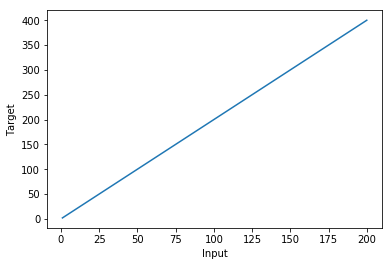

In [29]:
plt.plot(x, y)
plt.ylabel('Target')
plt.xlabel('Input')
plt.show()

> Assume that $w=1.0$

In [34]:
w_lst = []
mse_lst = []

def forward(x):
    return x * w

def loss(x, y):
    Y = forward(x_val)
    return (Y - y) * (Y - y)

for w in np.arange(0.0, 4.1, 0.1):
    l_sum = 0
    for x_val, y_val in zip(x, y):
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)
        l_sum += l
    mse = l_sum / 200
    mse_lst.append(mse)
    w_lst.append(w)

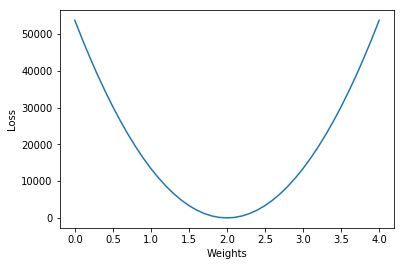

In [35]:
plt.plot(w_lst, mse_lst)
plt.ylabel('Loss')
plt.xlabel('Weights')
plt.show()

## Gradient descent algorithm

<img src="images/gradient_function.png">

### Gradient descent in PyTorch

In [68]:
from torch.autograd import Variable

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = Variable(torch.Tensor([1.0]),  requires_grad=True)

def forward_pass(x):
    return x * w

def cost_function(x, y):
    Y = forward_pass(x_val)
    return (Y - y) * (Y - y)

def gradient(x, y):
    return 2 * x * (x * w - y)

for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):
        l = cost_function(x_val, y_val)
        l.backward()
        print("\tgrad: ", x_val, y_val, w.grad.data[0])
        w.data = w.data - 0.01 * w.grad.data

        # Manually zero the gradients after updating weights
        w.grad.data.zero_()
    print("progress:", epoch, l.data[0])


	grad:  1.0 2.0 tensor(-2.)
	grad:  2.0 4.0 tensor(-7.8400)
	grad:  3.0 6.0 tensor(-16.2288)
progress: 0 tensor(7.3159)
	grad:  1.0 2.0 tensor(-1.4786)
	grad:  2.0 4.0 tensor(-5.7962)
	grad:  3.0 6.0 tensor(-11.9981)
progress: 1 tensor(3.9988)
	grad:  1.0 2.0 tensor(-1.0932)
	grad:  2.0 4.0 tensor(-4.2852)
	grad:  3.0 6.0 tensor(-8.8704)
progress: 2 tensor(2.1857)
	grad:  1.0 2.0 tensor(-0.8082)
	grad:  2.0 4.0 tensor(-3.1681)
	grad:  3.0 6.0 tensor(-6.5580)
progress: 3 tensor(1.1946)
	grad:  1.0 2.0 tensor(-0.5975)
	grad:  2.0 4.0 tensor(-2.3422)
	grad:  3.0 6.0 tensor(-4.8484)
progress: 4 tensor(0.6530)
	grad:  1.0 2.0 tensor(-0.4417)
	grad:  2.0 4.0 tensor(-1.7316)
	grad:  3.0 6.0 tensor(-3.5845)
progress: 5 tensor(0.3569)
	grad:  1.0 2.0 tensor(-0.3266)
	grad:  2.0 4.0 tensor(-1.2802)
	grad:  3.0 6.0 tensor(-2.6500)
progress: 6 tensor(0.1951)
	grad:  1.0 2.0 tensor(-0.2414)
	grad:  2.0 4.0 tensor(-0.9465)
	grad:  3.0 6.0 tensor(-1.9592)
progress: 7 tensor(0.1066)
	grad:  1.0 2.0 te

### PyTorch

Epoch [5/60], Loss: 7.4423
Epoch [10/60], Loss: 3.1465
Epoch [15/60], Loss: 1.4062
Epoch [20/60], Loss: 0.7010
Epoch [25/60], Loss: 0.4153
Epoch [30/60], Loss: 0.2995
Epoch [35/60], Loss: 0.2525
Epoch [40/60], Loss: 0.2333
Epoch [45/60], Loss: 0.2255
Epoch [50/60], Loss: 0.2223
Epoch [55/60], Loss: 0.2209
Epoch [60/60], Loss: 0.2202
Final Weights: tensor([[0.3470]])
Final Bias: tensor([0.1239])


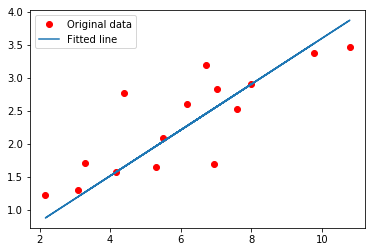

In [71]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
print ('Final Weights: {}'.format(model.weight.data))
print ('Final Bias: {}'.format(model.bias.data))
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()